## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

пропущенных значений в датасете нет, исходя из типа данных каждой колонки (float64), категориальных переменных нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
#я фиксировала не сид а рэндом стейт думаю не принципиально
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
newX_train = X_train[['alcohol', 'magnesium']]
newX_test = X_test[['alcohol', 'magnesium']]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# раньше я делала фит на всем иксе но наверное логично делать его только на трейне
scaler.fit(newX_train)


newX_train = scaler.transform(newX_train)
newX_test = scaler.transform(newX_test)

In [7]:
neighbours = [1, 3, 5, 10, 15, 25]
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = [KNeighborsClassifier(n_neighbors=i) for i in neighbours]

In [9]:
knns = [i.fit(newX_train, y_train) for i in knn]

In [10]:
y_pred_train = [np.mean(y_train==i.predict(newX_train)).round(6) for i in knns]
y_pred_test = [np.mean(y_test==i.predict(newX_test)).round(6) for i in knns]

In [11]:
df = pd.DataFrame(list(zip(neighbours, y_pred_train, y_pred_test)), columns = ['NN', 'Train', 'Test'])
df.set_index('NN', inplace = True)

In [12]:
print(df)

       Train      Test
NN                    
1   1.000000  0.666667
3   0.806452  0.777778
5   0.750000  0.722222
10  0.733871  0.777778
15  0.733871  0.796296
25  0.669355  0.796296


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [13]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [14]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [15]:
import itertools

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

дисклеймер: следующая часть у меня на компе ранится 12 минут, я даже считала с помощью модуля time

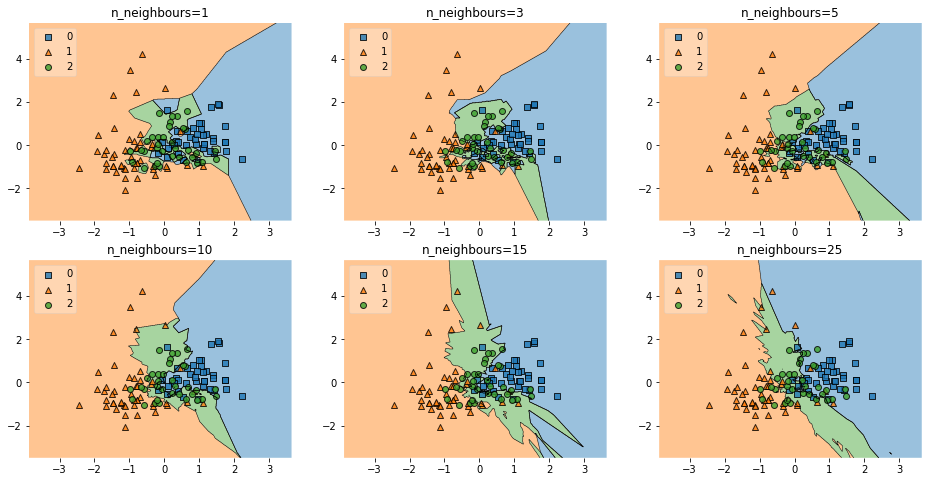

In [17]:
fig = plt.figure(figsize=(16, 8))

labels = ['1', '3', '5', '10', '15', '25']
labels = list(map(( lambda x: 'n_neighbours=' + x), labels))
for clf, lab, grd in zip(knns,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
#    clf.fit(X, y)     можно было бы взять knn которые еще не обученные но нафига я их тогда учила заранее
    ax = plt.subplot(gs[grd[0], grd[1]])
    # вот конкретно следующая строчка невыносимо долго ранится
    fig = plot_decision_regions(X = newX_train, y=y_train, clf=clf, legend=2, zoom_factor = 0.7)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

мы видим что низкие значения k плохо отражаются на качестве предсказаний на тестовой выборке, потому что knn ловит единичные примеры, а не общую закономерность. при увеличении числа k все лучше и лучше предсказываются общие тренды, что результируется в снижении качества предсказания на трейновой выборке и увеличении его же на тестовой.

однако, с какого-то момента может возникнуть недообучение и нам нужно его отловить: это проще всего сделать, если посмотреть на график решающей поверхности. хотя качество для 15 и 25 соседей оказывается одинаковым на тестовой выборке, график для 15 кажется мне более удобоваримым, потому что отражает основные тренды, не сильно упрощая и линеаризуя их (вообще самый симпатичный на 10 но там точность плавает чтож поделаешь)

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

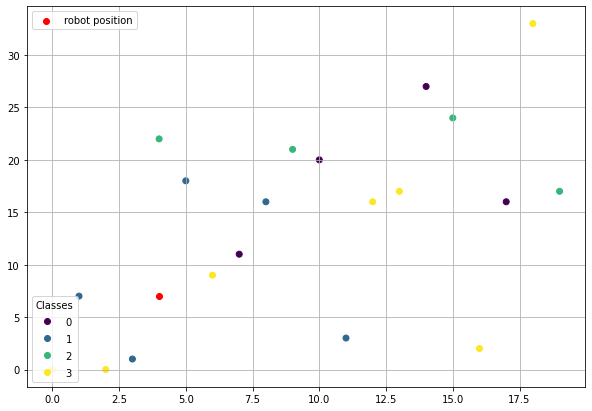

In [18]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier


In [20]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.row_stack((initial_position, initial_position))
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        next_point = int(self.knn.predict(self.trajectory[-1:]))
        if bool(np.random.binomial(1, 0.2, 1)):
            self.trajectory = np.row_stack((self.trajectory, (self.trajectory[-1:]+self.mapping[0])))
        else:
            self.trajectory = np.row_stack((self.trajectory, (self.trajectory[-1:]+self.mapping[next_point])))
        
    def show(self):
        return self.trajectory

In [21]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
        
    shows = robot.show()


    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = shows
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

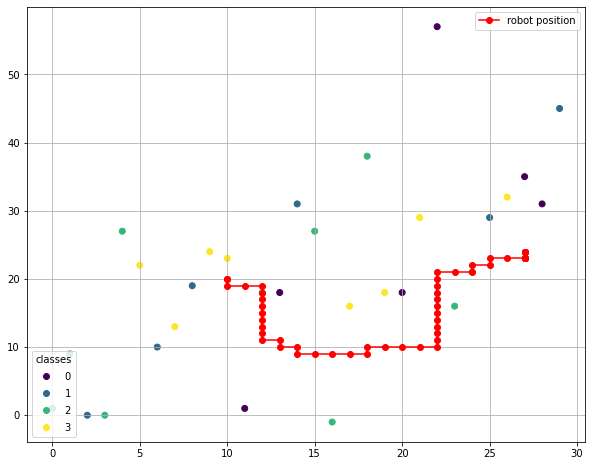

In [22]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

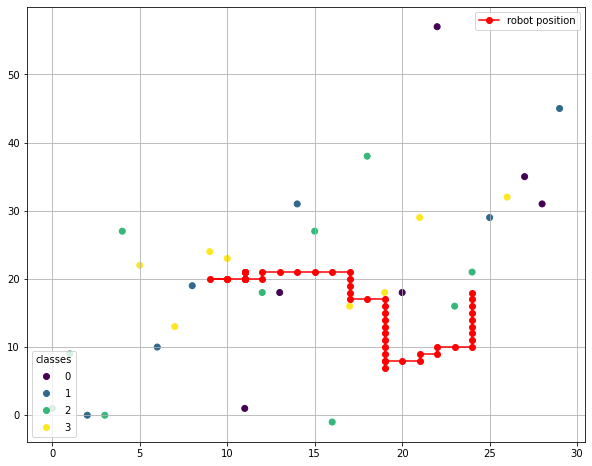

In [23]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

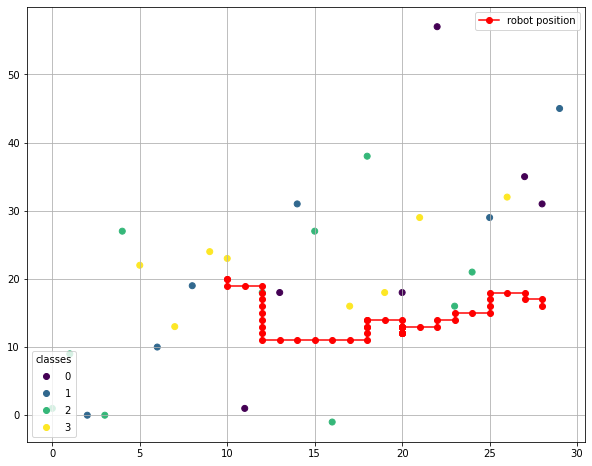

In [24]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

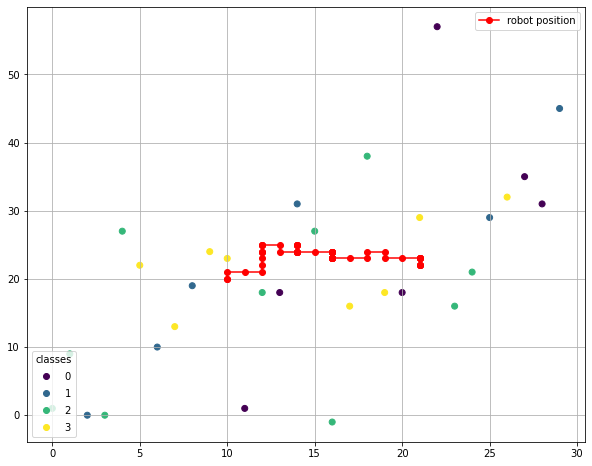

In [25]:
conduct_experiment(x, mean = 3, std = 10, k = 25, n_movements = 50)

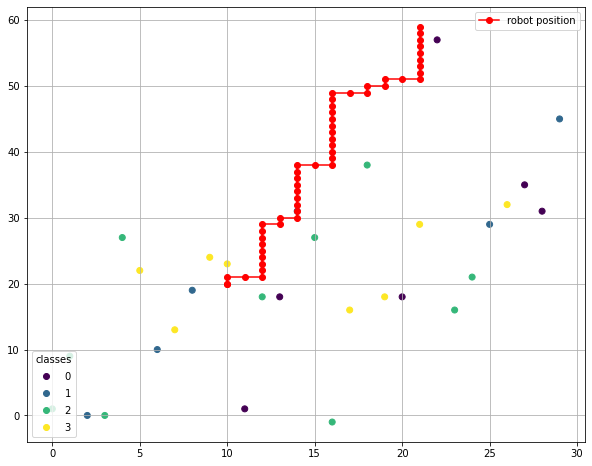

In [26]:
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

чем больше k тем больше график будет напоминать лестницу или прямую: в зависимости от преобладающего в выборке класса. в таком случае робот с вероятностью 0,8 будет двигаться в сторону класса, которого больше, и с 0,2 - вправо. чем меньше k, тем больше робот будет ориентироваться на локальные метки и двигаться неоднонаправленно. как видно, при k = 30 робот преимущественно двигался вверх, потому что соответствующих меток было больше всего, и дальше всего продвинулся по оси y. при других k роботы плутали и не выходили за пределы сетки 30*30. 

если расставить метки осмысленно, можно регулировать движение робота: делать локальные "стены в лабиринте", вероятность прохождения через которые будет увеличиваться с увеличением вероятности движения вправо при подбрасывании моменте и при увеличении k

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [27]:
data = pd.read_csv('C:/Users/user/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [29]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [30]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [31]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

как видно, пропусков нет ни среди категориальных, ни численных переменных

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [32]:
data.drop('Unnamed: 0',inplace=True,axis=1)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [33]:
import seaborn as sns

<AxesSubplot:title={'center':'выборочные корреляции между признаками'}>

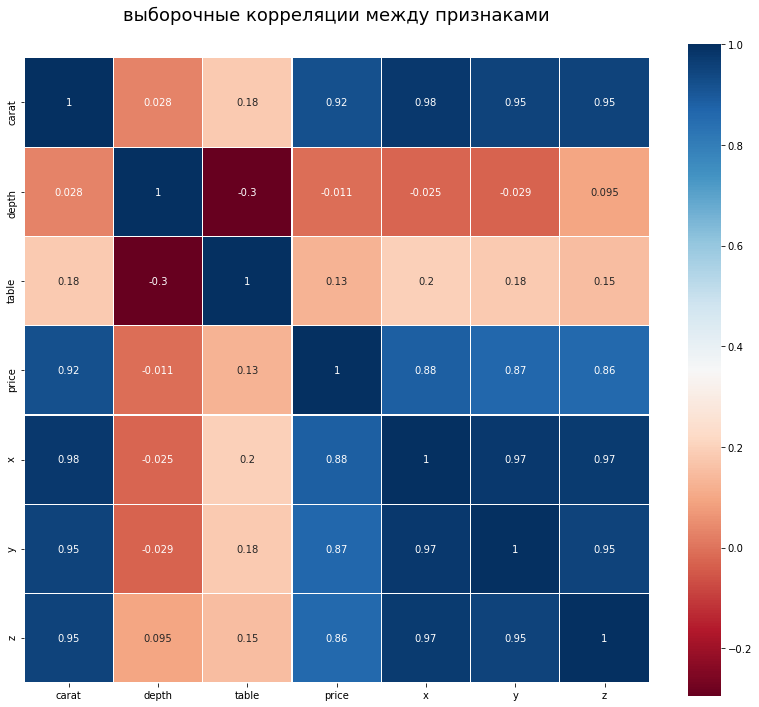

In [34]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

NumericData = data.select_dtypes(['int64','uint8', 'float64' ])

plt.title('выборочные корреляции между признаками', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

то же самое только таблицей:

In [35]:
NumericData.corr().sort_values(by='price', ascending=False  )

,carat,depth,table,price,x,y,z
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924


высокая корреляция с ценой заметна у таких параметров как кол-во карат и размер (x, y, z)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [36]:
data = pd.get_dummies(data, drop_first=True)

In [37]:
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [38]:
y = data.price

In [39]:
X = data.drop(['price'], axis = 1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

чето конечно не айс с выбросами да

<AxesSubplot:>

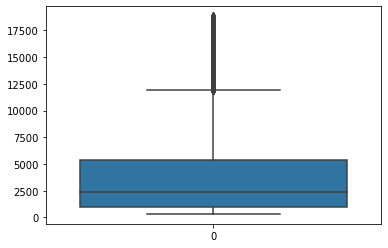

In [42]:
sns.boxplot(data = y_train)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
real=['carat','depth', 'table', 'x', 'y','z']

X_train[real] = scaler.fit_transform(X_train[real])
X_test[real] = scaler.transform(X_test[real])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error
mean_squared_error(y_train.to_numpy(), lr.predict(X_train))

1275235.8092912647

In [46]:
mean_squared_error(y_test.to_numpy(), lr.predict(X_test))

1525573.300175963

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [48]:
r_coef=lr.coef_[:6]
linreg_coef=pd.DataFrame(np.abs(r_coef),index=real, columns = ['linear regression'])
linreg_coef

,linear regression
carat,5322.873988
depth,82.766451
table,55.037561
x,2284.035505
y,1202.621437
z,52.573877


эти вещественные переменные  - кол-во карат, x и y (т.е. размеры)

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(X_train, y_train)
mean_squared_error(y_train.to_numpy(), lasso.predict(X_train))

1505538.822517714

In [50]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)
mean_squared_error(y_train.to_numpy(), ridge.predict(X_train))

1279236.447326394

In [51]:
lasso_coef=pd.DataFrame(np.abs(lasso.coef_[:6]),index=real, columns = ['lasso'])

In [52]:
ridge_coef=pd.DataFrame(np.abs(ridge.coef_[:6]),index=real, columns = ['ridge'])

In [53]:
df = pd.concat([ridge_coef, lasso_coef, linreg_coef], axis=1, join="inner")
df

,ridge,lasso,linear regression
carat,5271.556057,4780.569979,5322.873988
depth,87.099827,155.251386,82.766451
table,58.117641,102.607765,55.037561
x,2005.655426,704.101631,2284.035505
y,964.463758,0.000000,1202.621437
z,52.683324,8.554610,52.573877


если смотреть только на незаванхотэнкоженные переменные то ридж изменяет коэффициенты гораздо меньше чем лассо. лассо же может как увеличивать коэффициенты (depth, table) - примерно в 2 раза, в нашем случае, так и уменьшать. уменьшать он может сильно - в т.ч. обнулять переменные, которые до этого имели одни из самых больгих коэффициентов

оказалось, мультиколлинеарны такие переменные как x, y и z. что по сути логично потому что бриллианты плюс-минус круглые. наша изначальная моделька давала и иксу и игреку большие веса - немудрено, и та, и другая переменная сильно коррелируют с ценой. но в итоге роль их практически одинаковая оттого не грешно одну из них (то бишь игрек) выкинуть. а те переменные которые будучи независимыми от других раньше оставались с небольшими коэффициентами при лассо их повысили

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

не в юпитере этот предупреждение не выскакивало и все норм работало так что я его просто проигнорю, можно?)))0

In [54]:
alphas = [0.1, 1, 10, 100, 200]
lassos = [Lasso(i).fit(X_train, y_train) for i in alphas]
ridges = [Ridge(i).fit(X_train, y_train) for i in alphas]
lassos_norm = pd.DataFrame([np.linalg.norm(i.coef_) for i in lassos], columns = ['norm'])
ridges_norm = pd.DataFrame([np.linalg.norm(i.coef_) for i in ridges], columns = ['norm'])

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12394679552.903904, tolerance: 60405514.55975517
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334584993.8084717, tolerance: 60405514.55975517
  model = cd_fast.enet_coordinate_descent(


In [55]:
lassos_norm['alphas'] = alphas
lassos_norm['hue'] = ['lasso']*5

ridges_norm['alphas'] = alphas
ridges_norm['hue'] = ['ridge']*5

In [56]:
norms = pd.concat([ridges_norm, lassos_norm])

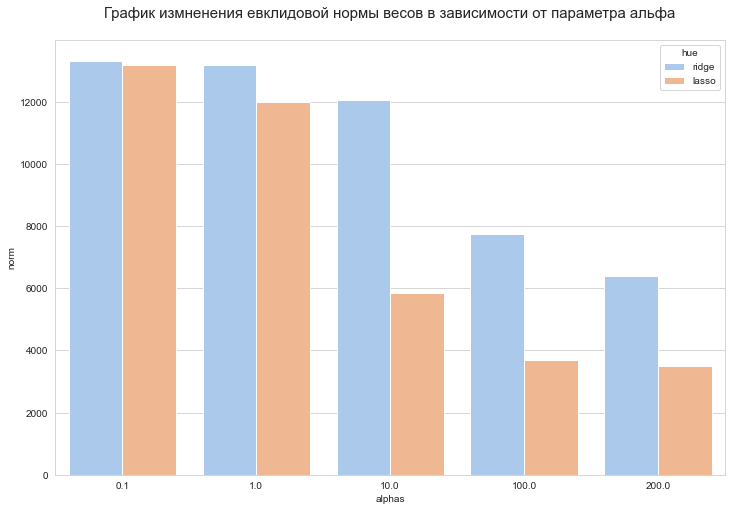

In [57]:
plt.figure(figsize=(12,8))
sns.set_palette("pastel")
sns.set_style(style = 'whitegrid')

plt.title('График измненения евклидовой нормы весов в зависимости от параметра альфа\n', size=15)

sns.barplot(x = norms['alphas'], y = norms['norm'], hue = norms['hue'])
pass

лассо агрессивнее(!) уменьшает веса, что заметно по графику))

некоторые признаки лассо и вовсе обнуляет (например, пресловутый игрек), так что их роль в модельке пропадает - они, мол, не важны, так что вклад у них будет нулевой. так можно отбирать ненужные признаки - у них будет стоять коэффициент ноль.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

## альфы по умолчанию

In [58]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV (cv=5).fit(X, y)

In [59]:
cvs = pd.DataFrame(lasso_cv.mse_path_)

In [60]:
cvs

,0,1,2,3,4
0,1.302565e+06,1.205206e+07,6.097441e+07,1.365126e+07,5.629861e+06
1,1.259745e+06,1.027509e+07,6.097441e+07,1.159769e+07,5.181122e+06
2,1.254153e+06,8.767090e+06,6.097441e+07,9.840899e+06,4.790566e+06
3,1.278808e+06,7.490486e+06,6.097441e+07,8.340247e+06,4.450632e+06
4,1.327781e+06,6.412782e+06,6.097441e+07,7.060534e+06,4.154743e+06
...,...,...,...,...,...
95,1.053633e+06,1.781305e+06,9.427942e+06,5.417512e+05,5.800767e+05
96,1.039129e+06,1.778325e+06,9.331304e+06,5.517608e+05,5.742581e+05
97,1.011408e+06,1.774934e+06,9.243780e+06,5.618214e+05,5.700947e+05
98,9.887084e+05,1.770101e+06,9.168888e+06,5.718351e+05,5.672937e+05


In [61]:
cvs = cvs.mean(axis = 1)

In [62]:
cvs.min()

2586510.1463693893

In [63]:
cvs.argmin()

99

In [64]:
best_alpha = lasso_cv.alphas_[cvs.argmin()]
best_alpha

3.957948112557627

## альфы которые вы предложили

In [65]:
lasso_cv = LassoCV (alphas = alphas, cv=5).fit(X, y)

In [66]:
cvs = pd.DataFrame(lasso_cv.mse_path_)
cvs = cvs.mean(axis = 1)
cvs.min()

2244236.686224208

In [67]:
best_alpha = lasso_cv.alphas_[cvs.argmin()]
best_alpha

0.1

ваша альфа 0.1 оказалась лучше чем те альфы которые предлагал LassoCV ну чтож возьмем вашу

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [68]:
cols = list(data.columns)
cols.remove('price')

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_train, y_train)
lasso_coef=pd.DataFrame(np.abs(lasso.coef_),index=cols)
lasso_coef

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12394679552.903904, tolerance: 60405514.55975517
  model = cd_fast.enet_coordinate_descent(


,0
carat,5313.434457
depth,84.316075
table,56.206149
x,2097.477054
y,1025.150017
z,52.909207
cut_Good,534.136404
cut_Ideal,783.225742
cut_Premium,745.401571
cut_Very Good,666.118359


In [70]:
mean_squared_error(y_train.to_numpy(), lasso.predict(X_train))

1275355.7527069936

самыми информативными оказались признаки связанные с кол-вом карат и чистотой - что логично, на бытовом уровне чем больше и "чище"(?) бриллиант, тем он должен быть дороже

выродились такие признаки как размер по координате y (объяснение этого факта приведено выше) и один из цветов - потому что единичка в этом цвете это то же самое что нолики во всех других. короче значение в колонке этого цвета можно предсказать по наличию единички в других колонках цветов.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [71]:
mean_squared_error(y_test.to_numpy(), lasso.predict(X_test))

1458092.3618987459

In [72]:
mean_squared_error(y_test.to_numpy(), lr.predict(X_test))

1525573.300175963

в общем-то из-за мудрежа с сидами сложно что-то сказать про полученные резы. нас предупреждали, что данные с выбросами, но мы маленькие и выбросы красиво убирать не умеем, что ограничивает наши способности в интерпретации результатов

наверное лучшее что можно сделать это перебрать как можно больше (!) вариантов трейнтестсплита с разными рэндом стейтами и посмотреть как обычно получается, а не прибегать к рандомному анализу рандомно полученных величин.
алгос я сюда перекидывать не буду потому что 1) это просто копипаста выборочных кусоков из этой тетрадки 2) упакованная в цикл. а вы за циклы больно бьете.

но по сути было проведено 3 эксперимента на циклах рэндом стейтов от 1 до 100
целью их было узнать при каком кол-ве рэндом стейтов из 100

1 - на изначальной линейной регрессии ошибка на тесте больше чем ошибка на трейне

2 - ошибка в тесте на лассо меньше чем на регрессии (на лассо cv были использованы альфы по умолчанию)

3 - сочетание 1 и 2: и ошибка на тесте больше чем на трейне и ошибка на лассо меньше чем на регрессии

по итогу резы такие:
    
1 - 58/100

2 - 6/100 (и там есть тот самый стейт 65 который по нелепой случайности использовала я)

3 - 4/100

ну в общем да очевидно обычно ошибка в тесте на лассо больше чем на регрессии. это объяснимо - когда мы подбирали оптимальную альфу (а она по сути уровень вмешательства в коэффициенты - чем она больше, тем вмешательство больше), на стандартном наборе альф оптимальной оказалась самая маленькая из предложенных - 3 с копейками, а на вашем наборе лучшие резы показала еще меньшая альфа - 0.1. значит чем меньше мы вмешиваемся в алгос изначальной регрессии, тем он лучше работает.

вообще вся цель лассо в том чтобы штрафовать за переобучение. из того, что лучший штраф это 0 можно сделать простой вывод о том что модель не переобучилась. да что ж ей переобучаться -  у нас фич мало и они почти все независимы и вносят какой-то доп вклад в работу